# Average Photon Number and Equivalent temperature

In [257]:
#import Libraries for calculation and plot
import numpy as np # import math library
import matplotlib.pyplot as plt #plot library
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

#Defining useful Functions
#returns the expected power spectral density of a photon at frequency f generated by a 50Ohm resistor at temperature T
def VoltagePSD(f,T):
    h=6.62e-34
    kB=1.38e-23
    R=50.0
    value=4*kB*T*R*(h*f)/(np.exp((h*f)/(kB*T))-1)
    return value

#returns the termperature of the photon generated by a 50Ohm resistor 
def findEqTemp(f,noise):
    x=np.zeros(len(f))
    if len(f)!=len(noise):
        print("Error, the vector have to have the same leght")
    else:
        for i in range(len(f)):
            while VoltagePSD(f[i],x[i])<noise[i]:
                x[i]+=0.0001
    return x

#calculate the average photon number for an expected frequency and temperature 
def AvPhotNum(f,T):
    h=6.62e-34
    kB=1.38e-23
    nth=np.zeros(len(f))
    if len(f)!=len(T):
        print("Error, the vector have to have the same leght")
    else:
        for i in range(len(f)):
            nth[i]=1/(np.exp(f[i]*h/(kB*T[i]))-1)
    return nth

#Convert from frequency to temperature
def N2T(f,nth):
    h=6.62e-34
    kB=1.38e-23
    T=np.zeros(len(f))
    if len(f)!=len(nth):
        print("Error, the vector have to have the same leght")
    else:
        for i in range(len(f)):
            T[i]=h*f[i]/(kB*np.log((nth[i]+1)/nth[i]))
    return T

#calculates the transmitted photons throu an attenuator
def NThrou(att,nthIN, nthOUT):
    A=10**(att/10)
    return ((nthIN/A)+(nthOUT*(A-1))/A)

#Define some plot parameters
fMin=1e8 #minumum frequency in Hz
fMax=1e11 #maximum frequency in Hz
points=1e2 #number of point in the plot
cutOffFreq=5e9 #frequency at the calculation point in Hz

#generating a vector with logarithmic spaced frequencies
frequencies=np.logspace(np.log10(fMin), np.log10(fMax), points, base=10.0)

#Temperatures of the different stages in the fridge
stageT=[300, 50 ,3, 0.8, 0.1, 0.01]


### Average photons at the different stages without attenuation

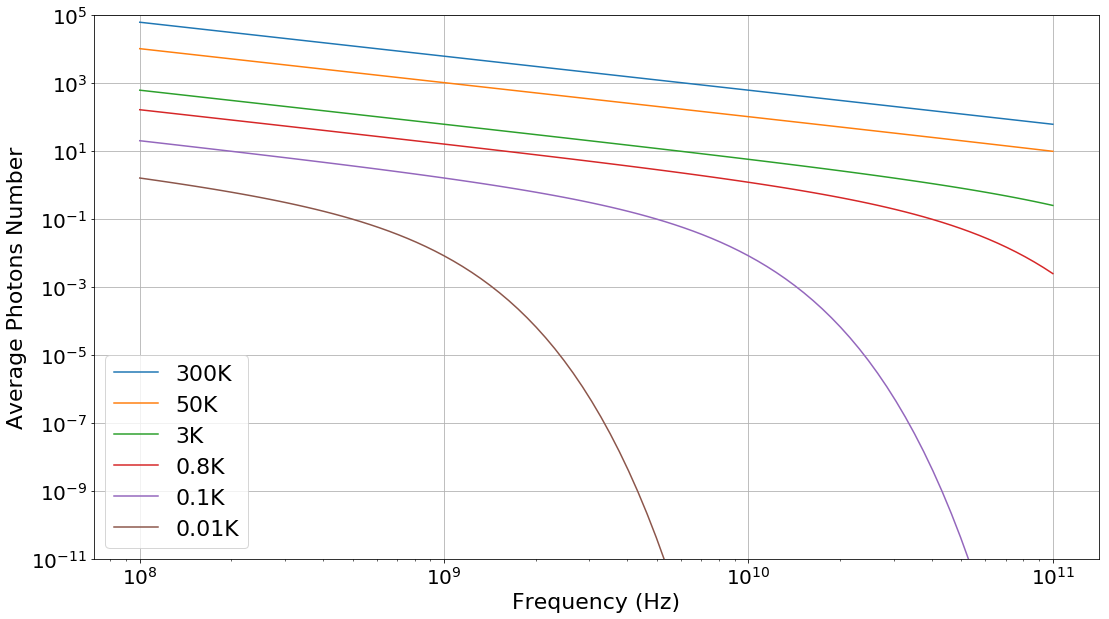

In [209]:
#Plot the different black body radiation for the different stages
plt.figure(figsize=(18,10))
for i in stageT:
    label= str(i) + "K"
    plt.loglog(frequencies,AvPhotNum(frequencies,i*np.ones(len(frequencies))), label=label)
plt.ylim([1e-11, 1e5])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Average Photons Number', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);

### Average photon number through all stages

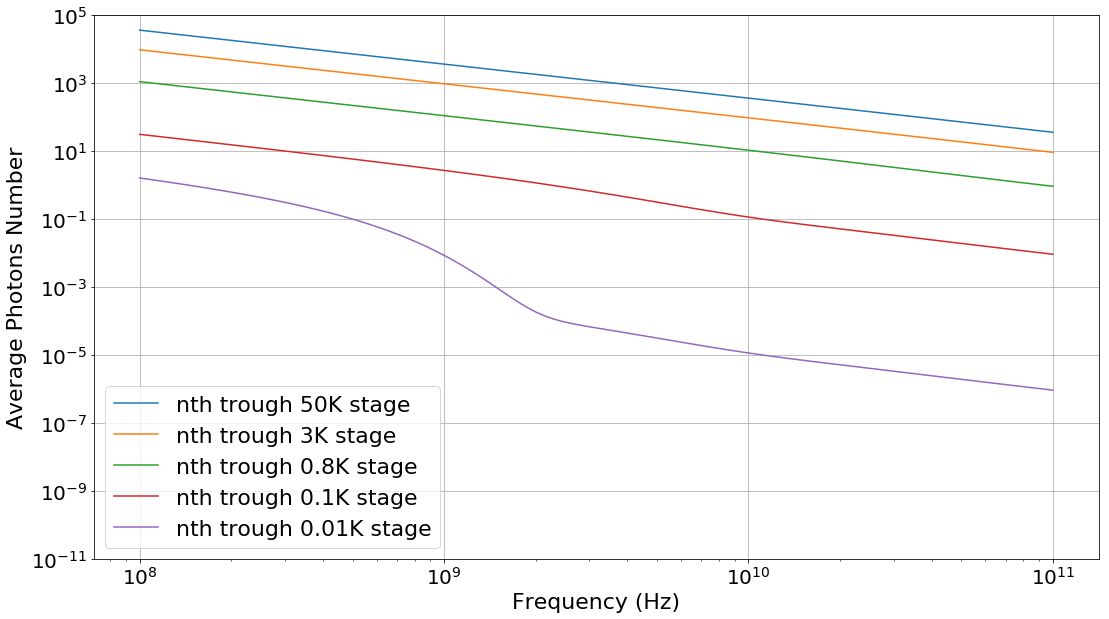

In [258]:
#lines attenuation parameters (in dB)
att=np.zeros(len(stageT))
att=[0, 3, 6, 10, 20, 40]

nTh=AvPhotNum(frequencies,stageT[0]*np.ones(len(frequencies)))
plt.figure(figsize=(18,10))
for i in range(len(stageT)-1):
    nTh=NThrou(att[i+1],nTh,AvPhotNum(frequencies,stageT[i+1]*np.ones(len(frequencies))))
    label="nth trough " + str(stageT[i+1]) + "K stage"
    plt.loglog(frequencies,nTh, label=label)
plt.ylim([1e-11, 1e5])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Average Photons Number', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);





### Comparison effective photon number and expected at 10mK

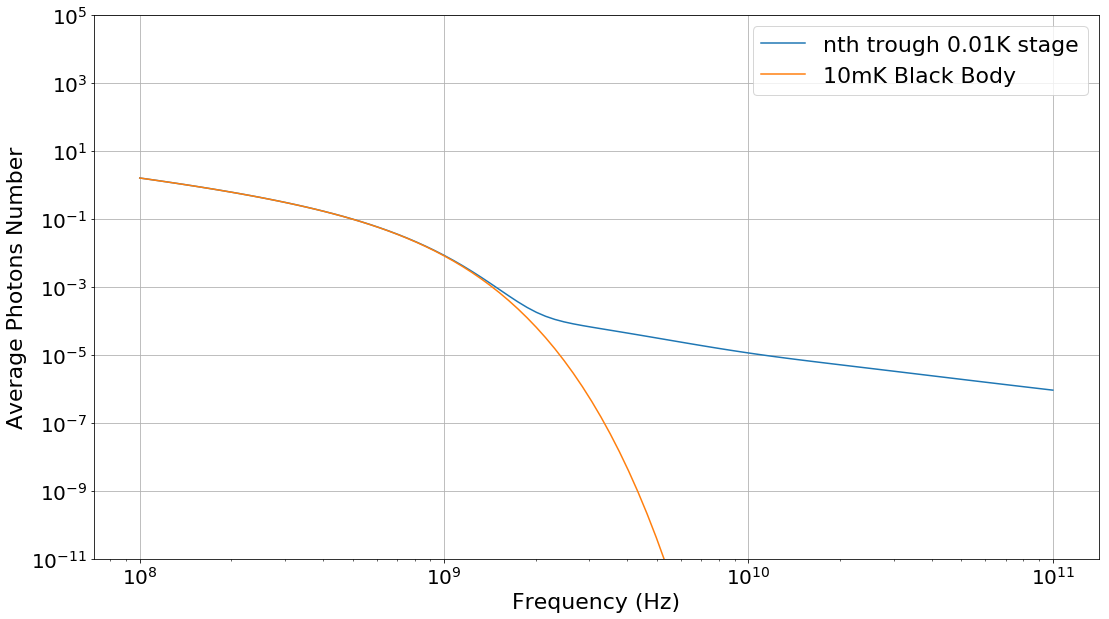

In [259]:
nTh=AvPhotNum(frequencies,stageT[0]*np.ones(len(frequencies)))
plt.figure(figsize=(18,10))
for i in range(len(stageT)-1):
    nTh=NThrou(att[i+1],nTh,AvPhotNum(frequencies,stageT[i+1]*np.ones(len(frequencies))))
    label="nth trough " + str(stageT[i+1]) + "K stage"
plt.loglog(frequencies,nTh, label=label)
plt.loglog(frequencies,AvPhotNum(frequencies,0.01*np.ones(len(frequencies))), label="10mK Black Body")
plt.ylim([1e-11, 1e5])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Average Photons Number', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);


### Average photon number at 10mK stage for different MC attenuation

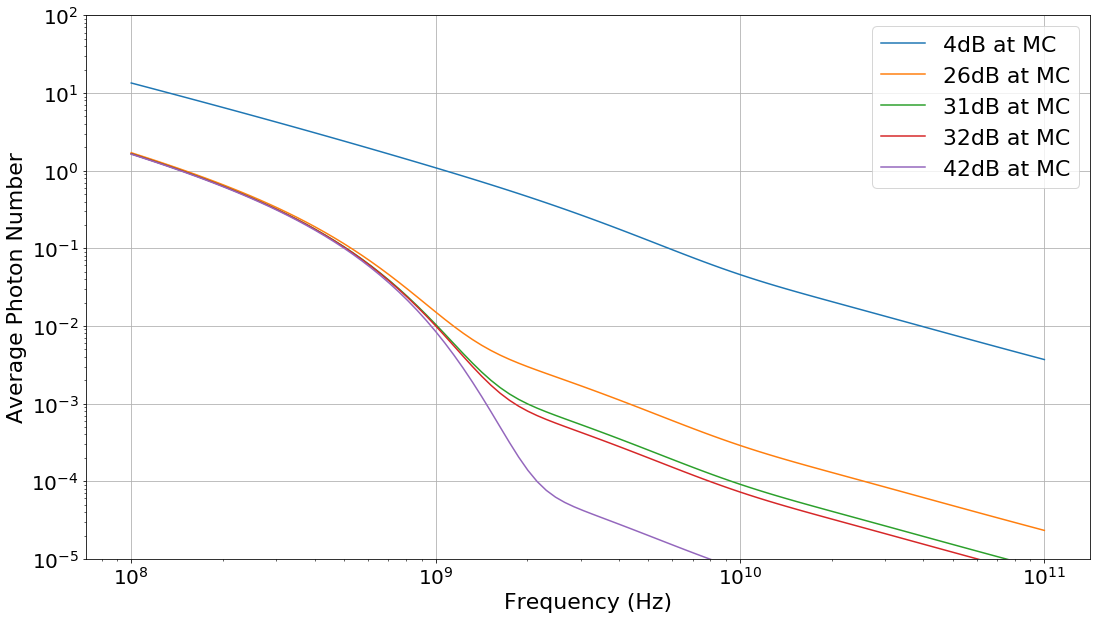

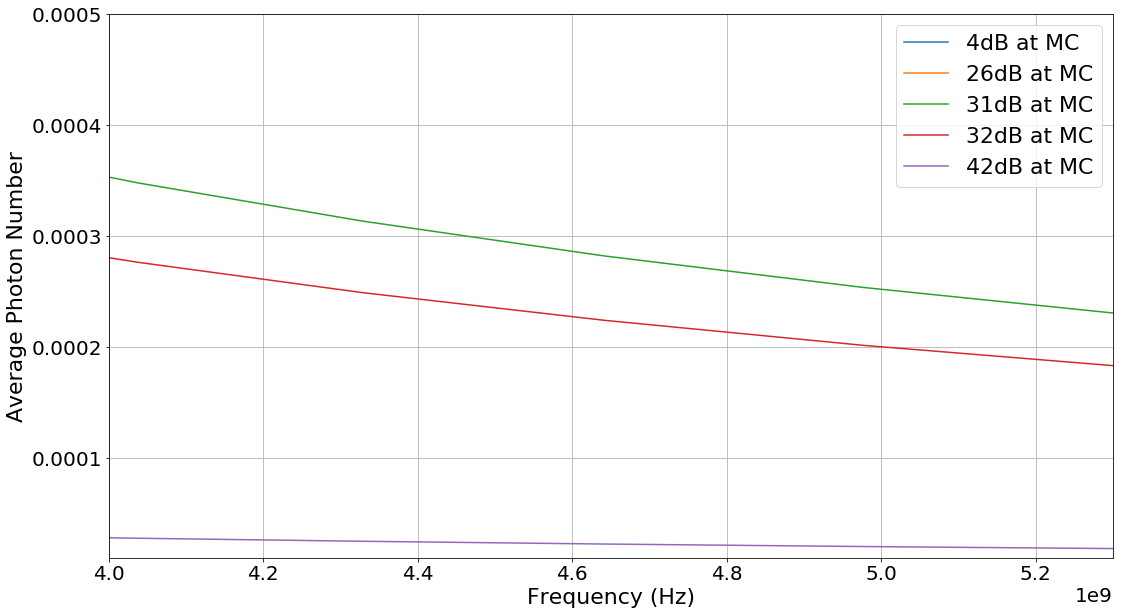

In [260]:
att=np.zeros(len(stageT))
MCatt=[4, 26, 31, 32, 42]


plt.figure(figsize=(18,10))
for j in range(len(MCatt)):
    att=[0, 3, 6, 10, 20, MCatt[j]]
    nTh=AvPhotNum(frequencies,stageT[0]*np.ones(len(frequencies)))
    for i in range(len(stageT)-1):
        nTh=NThrou(att[i+1],nTh,AvPhotNum(frequencies,stageT[i+1]*np.ones(len(frequencies))))
    label=str(MCatt[j]) + "dB at MC"
    plt.loglog(frequencies,nTh, label=label)
plt.ylim([1e-5, 1e2])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Average Photon Number', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);

plt.figure(figsize=(18,10))
for j in range(len(MCatt)):
    att=[0, 3, 6, 10, 20, MCatt[j]]
    nTh=AvPhotNum(frequencies,stageT[0]*np.ones(len(frequencies)))
    for i in range(len(stageT)-1):
        nTh=NThrou(att[i+1],nTh,AvPhotNum(frequencies,stageT[i+1]*np.ones(len(frequencies))))
    label=str(MCatt[j]) + "dB at MC"
    plt.plot(frequencies,nTh, label=label)
plt.xlim([4e9, 5.3e9])
plt.ylim([1e-5, 0.0005])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Average Photon Number', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);


### Equivalent temperature

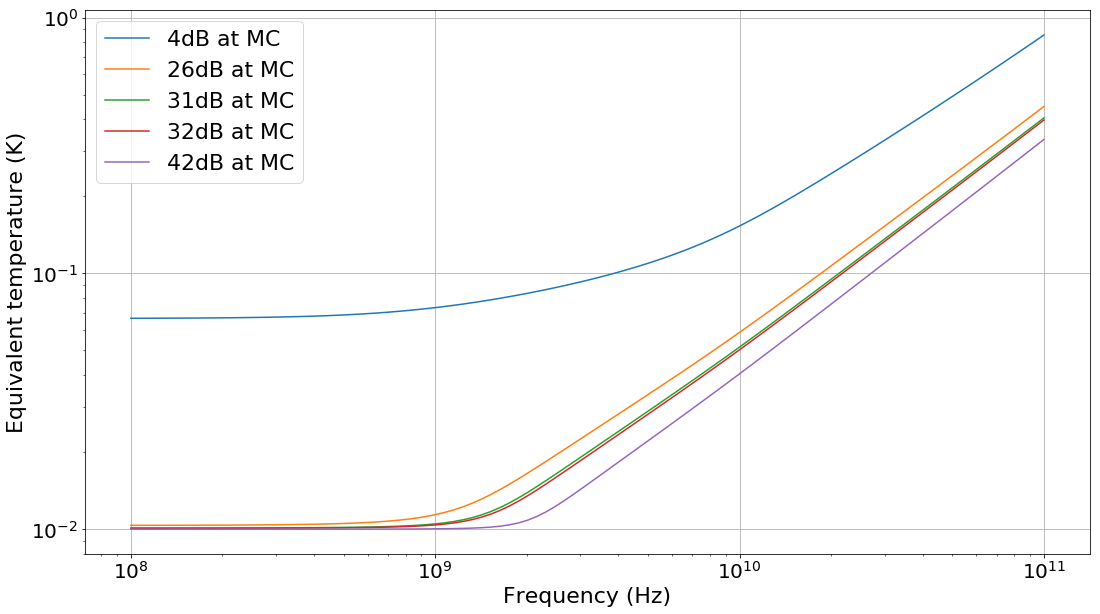

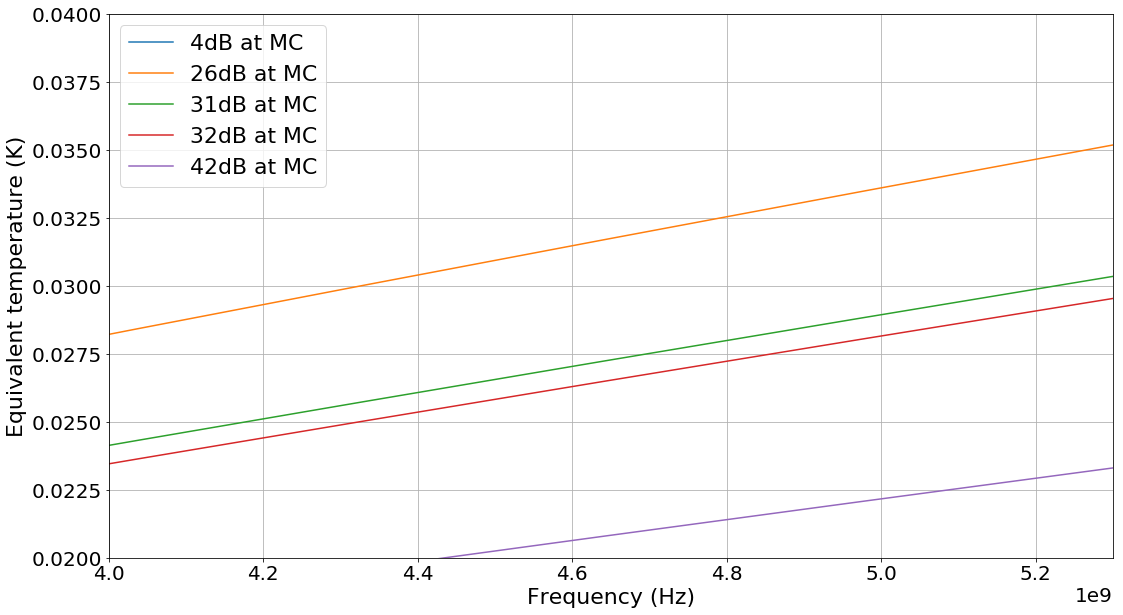

In [261]:
att=np.zeros(len(stageT))
MCatt=[4, 26, 31, 32, 42]

plt.figure(figsize=(18,10))
for j in range(len(MCatt)):
    att=[0, 3, 6, 10, 20, MCatt[j]]
    nTh=AvPhotNum(frequencies,stageT[0]*np.ones(len(frequencies)))
    for i in range(len(stageT)-1):
        nTh=NThrou(att[i+1],nTh,AvPhotNum(frequencies,stageT[i+1]*np.ones(len(frequencies))))
    label=str(MCatt[j]) + "dB at MC"
    Tem=N2T(frequencies,nTh)
#    print("Stage: ", stageT[i+1], "\tFrequency: ", frequencies[index]/1e9, "\tT: ", Tem[index], "K")
    plt.loglog(frequencies,Tem, label=label)
   
#plt.ylim([1e-5, 1e2])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Equivalent temperature (K)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);

plt.figure(figsize=(18,10))
for j in range(len(MCatt)):
    att=[0, 3, 6, 10, 20, MCatt[j]]
    nTh=AvPhotNum(frequencies,stageT[0]*np.ones(len(frequencies)))
    for i in range(len(stageT)-1):
        nTh=NThrou(att[i+1],nTh,AvPhotNum(frequencies,stageT[i+1]*np.ones(len(frequencies))))
    label=str(MCatt[j]) + "dB at MC"
    plt.plot(frequencies,N2T(frequencies,nTh), label=label)
plt.xlim([4e9, 5.3e9])
#plt.yscale('log')
plt.ylim([0.02, 0.04])
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Equivalent temperature (K)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=22);

